In [13]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.__version__)


Num GPUs Available:  1
2.10.0


In [14]:
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")


Notebook last run (end-to-end): 2024-05-29 17:47:25.787378


In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.datasets import make_circles


# Binary classification

In [17]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.04, random_state=42)

In [18]:
y[:3]

array([1, 1, 1], dtype=int64)

In [19]:
X[:3]

array([[ 0.74822656,  0.23908325],
       [-0.74509559,  0.16097526],
       [-0.82262532,  0.19762051]])

In [20]:
circles = pd.DataFrame(
    {'X0': X[:,0],
    'X1':X[:,1],
    'label':y
}
)
circles.head()

,X0,X1,label
0,0.748227,0.239083,1
1,-0.745096,0.160975,1
2,-0.822625,0.197621,1
3,-0.411433,0.682556,1
4,0.443905,-0.895829,0


In [21]:
# labels count
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

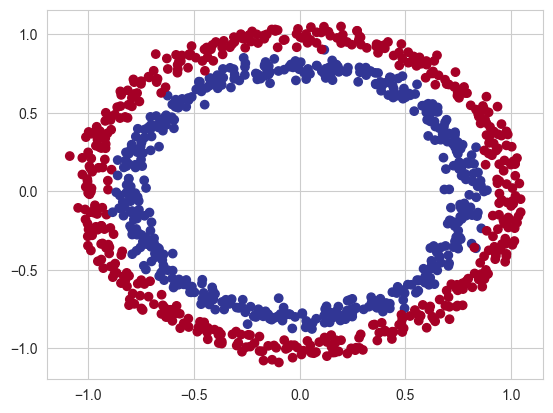

In [22]:
plt.scatter(circles.X0,circles.X1,c=y,cmap=plt.cm.RdYlBu)

In [23]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)

In [25]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation=tf.keras.activations.relu),# Need to use relu to add non-linearity in the model
    tf.keras.layers.Dense(20,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
    
])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               loss=tf.keras.losses.binary_crossentropy,
               metrics=['accuracy'])



In [26]:
# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1/(epoch+0.001)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch


In [27]:
history = model1.fit(X_train,y_train,epochs=100,verbose=0)

In [28]:
accuracy = model1.evaluate(X_test,y_test,verbose=0)[1]
print(f"Model accuracy : {100*accuracy:.2f}%")

Model accuracy : 99.50%


313/313 [==============================] - 0s 952us/step
doing binary classifcation...


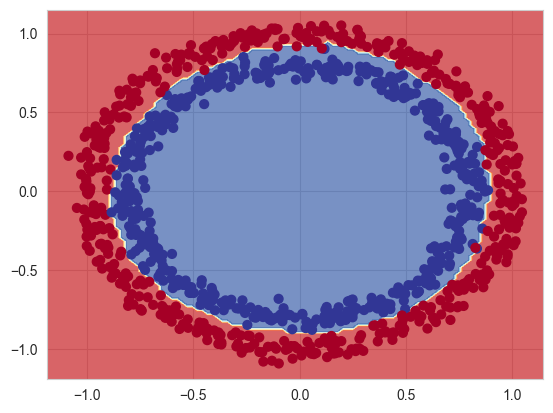

In [29]:
plot_decision_boundary(model1, X, y)


313/313 [==============================] - 0s 960us/step
doing binary classifcation...
313/313 [==============================] - 0s 968us/step
doing binary classifcation...


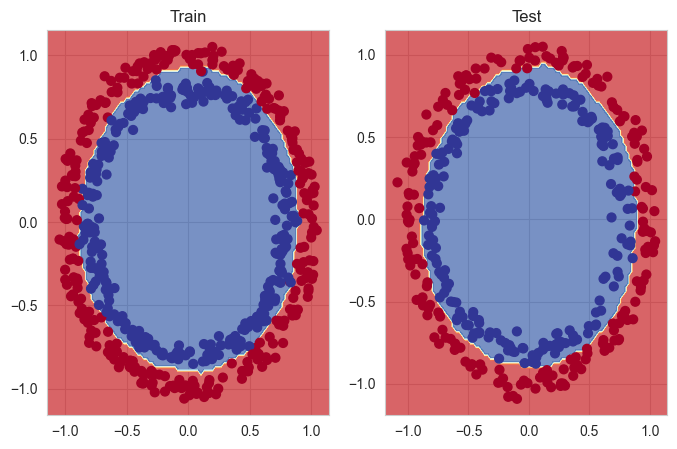

In [30]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model1, X_test, y_test)

<Axes: >

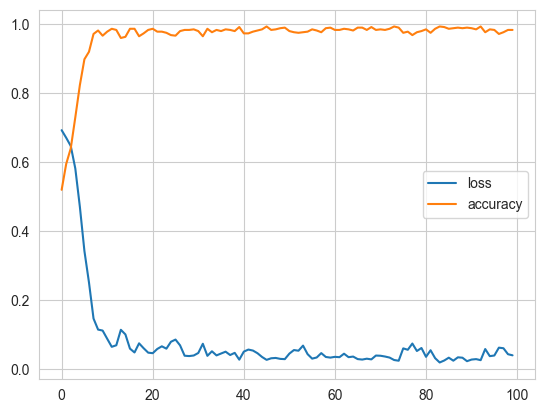

In [31]:
pd.DataFrame(history.history).plot()

13/13 [==============================] - 0s 1ms/step


<Axes: >

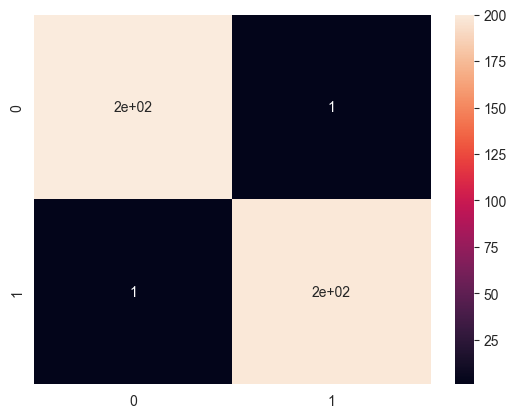

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred=model1.predict(X_test)

cf_matrix= confusion_matrix(y_test, tf.round(y_pred))

sns.heatmap(cf_matrix, annot=True)


# Multiclass classification


In [101]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [34]:
print(f'train data : \n {x_train.shape, y_train.shape}')
print(f'test data : \n {x_test.shape, y_test.shape}')

train data : 
 ((60000, 28, 28), (60000,))
test data : 
 ((10000, 28, 28), (10000,))


In [35]:
x_train[0].dtype # == uint8 beceause max value = 255

dtype('uint8')

(<matplotlib.image.AxesImage at 0x2301e07a1f0>, 2)

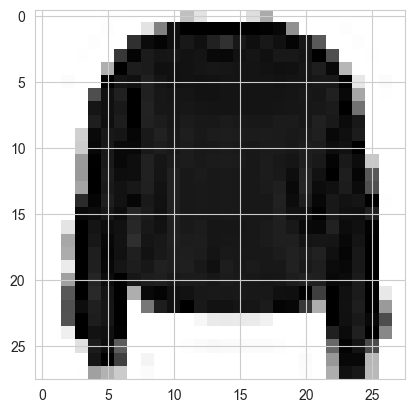

In [48]:
plt.imshow(x_train[7],cmap=plt.cm.binary),y_train[7]

In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

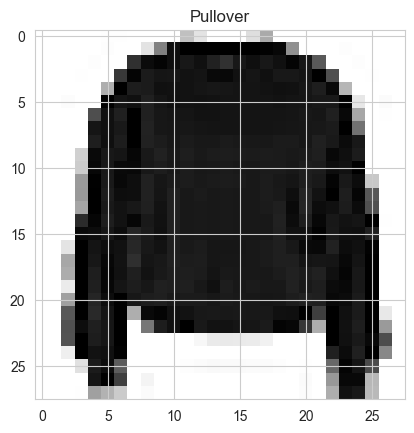

In [55]:
plt.imshow(x_train[7],cmap=plt.cm.binary)
plt.title(class_names[y_train[7]]);

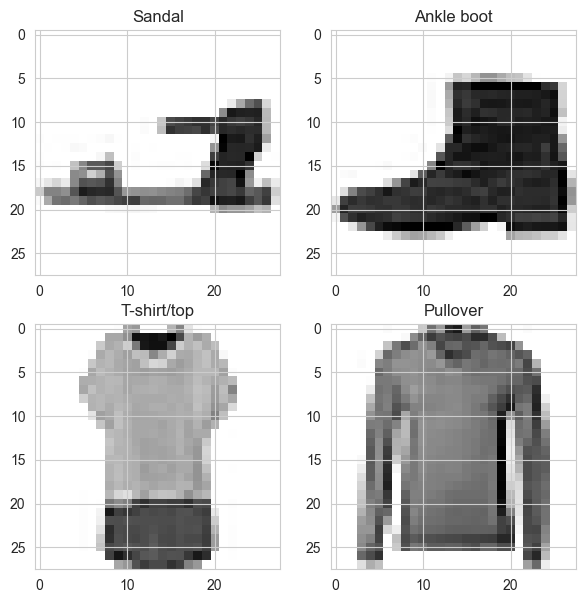

In [62]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1) # 2,2 means the plots matrix shape
    rand_index = random.randint(0,len(x_train)-1)
    plt.imshow(x_train[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[y_train[rand_index]])
    plt.axis=False

In [113]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model2.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])

In [114]:
non_norm_history = model2.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4842 - accuracy: 0.1891
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6205 - accuracy: 0.3351
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5477 - accuracy: 0.3507
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4335 - accuracy: 0.3961
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3205 - accuracy: 0.4338


In [131]:
norm_x_train =x_train/255
norm_x_test =x_test/255

norm_x_train.min(), norm_x_train.max()

(0.0, 1.0)

In [140]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model3.compile(optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])
norm_history = model3.fit(norm_x_train,y_train,epochs=5,validation_data=(norm_x_test,y_test))


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6775 - accuracy: 0.7605 - val_loss: 0.5223 - val_accuracy: 0.8177
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4741 - accuracy: 0.8329 - val_loss: 0.5118 - val_accuracy: 0.8208
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4420 - accuracy: 0.8447 - val_loss: 0.4778 - val_accuracy: 0.8252
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4216 - accuracy: 0.8519 - val_loss: 0.4582 - val_accuracy: 0.8353
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4096 - accuracy: 0.8536 - val_loss: 0.4760 - val_accuracy: 0.8258


<Axes: title={'center': 'normalized loss'}>

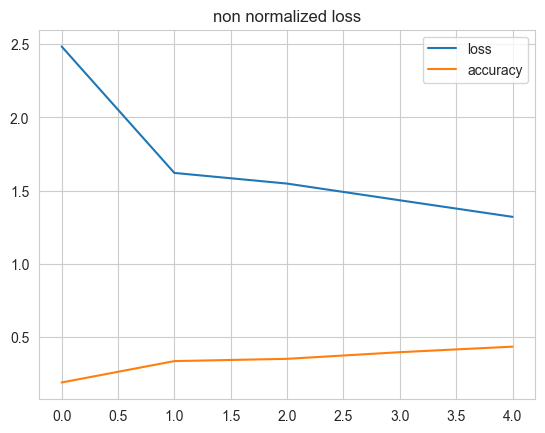

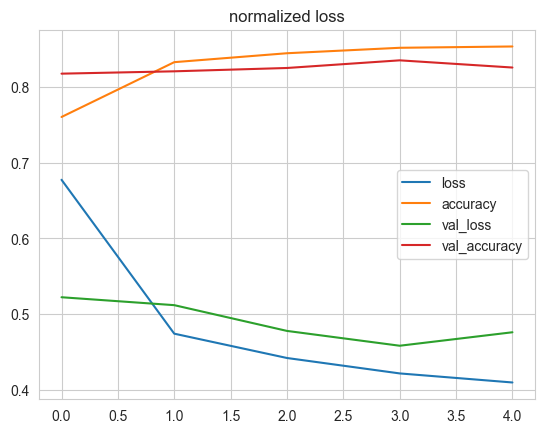

In [141]:
pd.DataFrame(non_norm_history.history).plot(title='non normalized loss')
pd.DataFrame(norm_history.history).plot(title='normalized loss')

In [148]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [149]:
y_probs = model3.predict(norm_x_test) # "probs" is short for probabilities


313/313 [==============================] - 0s 1ms/step


In [150]:
y_probs.shape

(10000, 10)

In [151]:
y_pred= y_probs.argmax(axis=1)


In [152]:
y_pred.shape

(10000,)

In [153]:
confusion_matrix(y_true=y_test,
                 y_pred=y_pred)

array([[728,   5,  18,  86,  13,   4, 134,   0,  12,   0],
       [  2, 952,   6,  32,   7,   0,   0,   0,   1,   0],
       [ 14,   4, 655,  15, 257,   0,  48,   1,   5,   1],
       [  9,   8,  11, 884,  59,   2,  23,   0,   4,   0],
       [  0,   2,  54,  25, 892,   0,  22,   0,   5,   0],
       [  0,   0,   0,   1,   0, 944,   0,  42,   1,  12],
       [114,   2, 102,  73, 273,   0, 416,   1,  18,   1],
       [  0,   0,   0,   0,   0,  34,   0, 954,   0,  12],
       [  3,   0,   8,  11,   9,  10,  10,   9, 939,   1],
       [  0,   0,   0,   1,   0,  29,   0,  75,   1, 894]], dtype=int64)

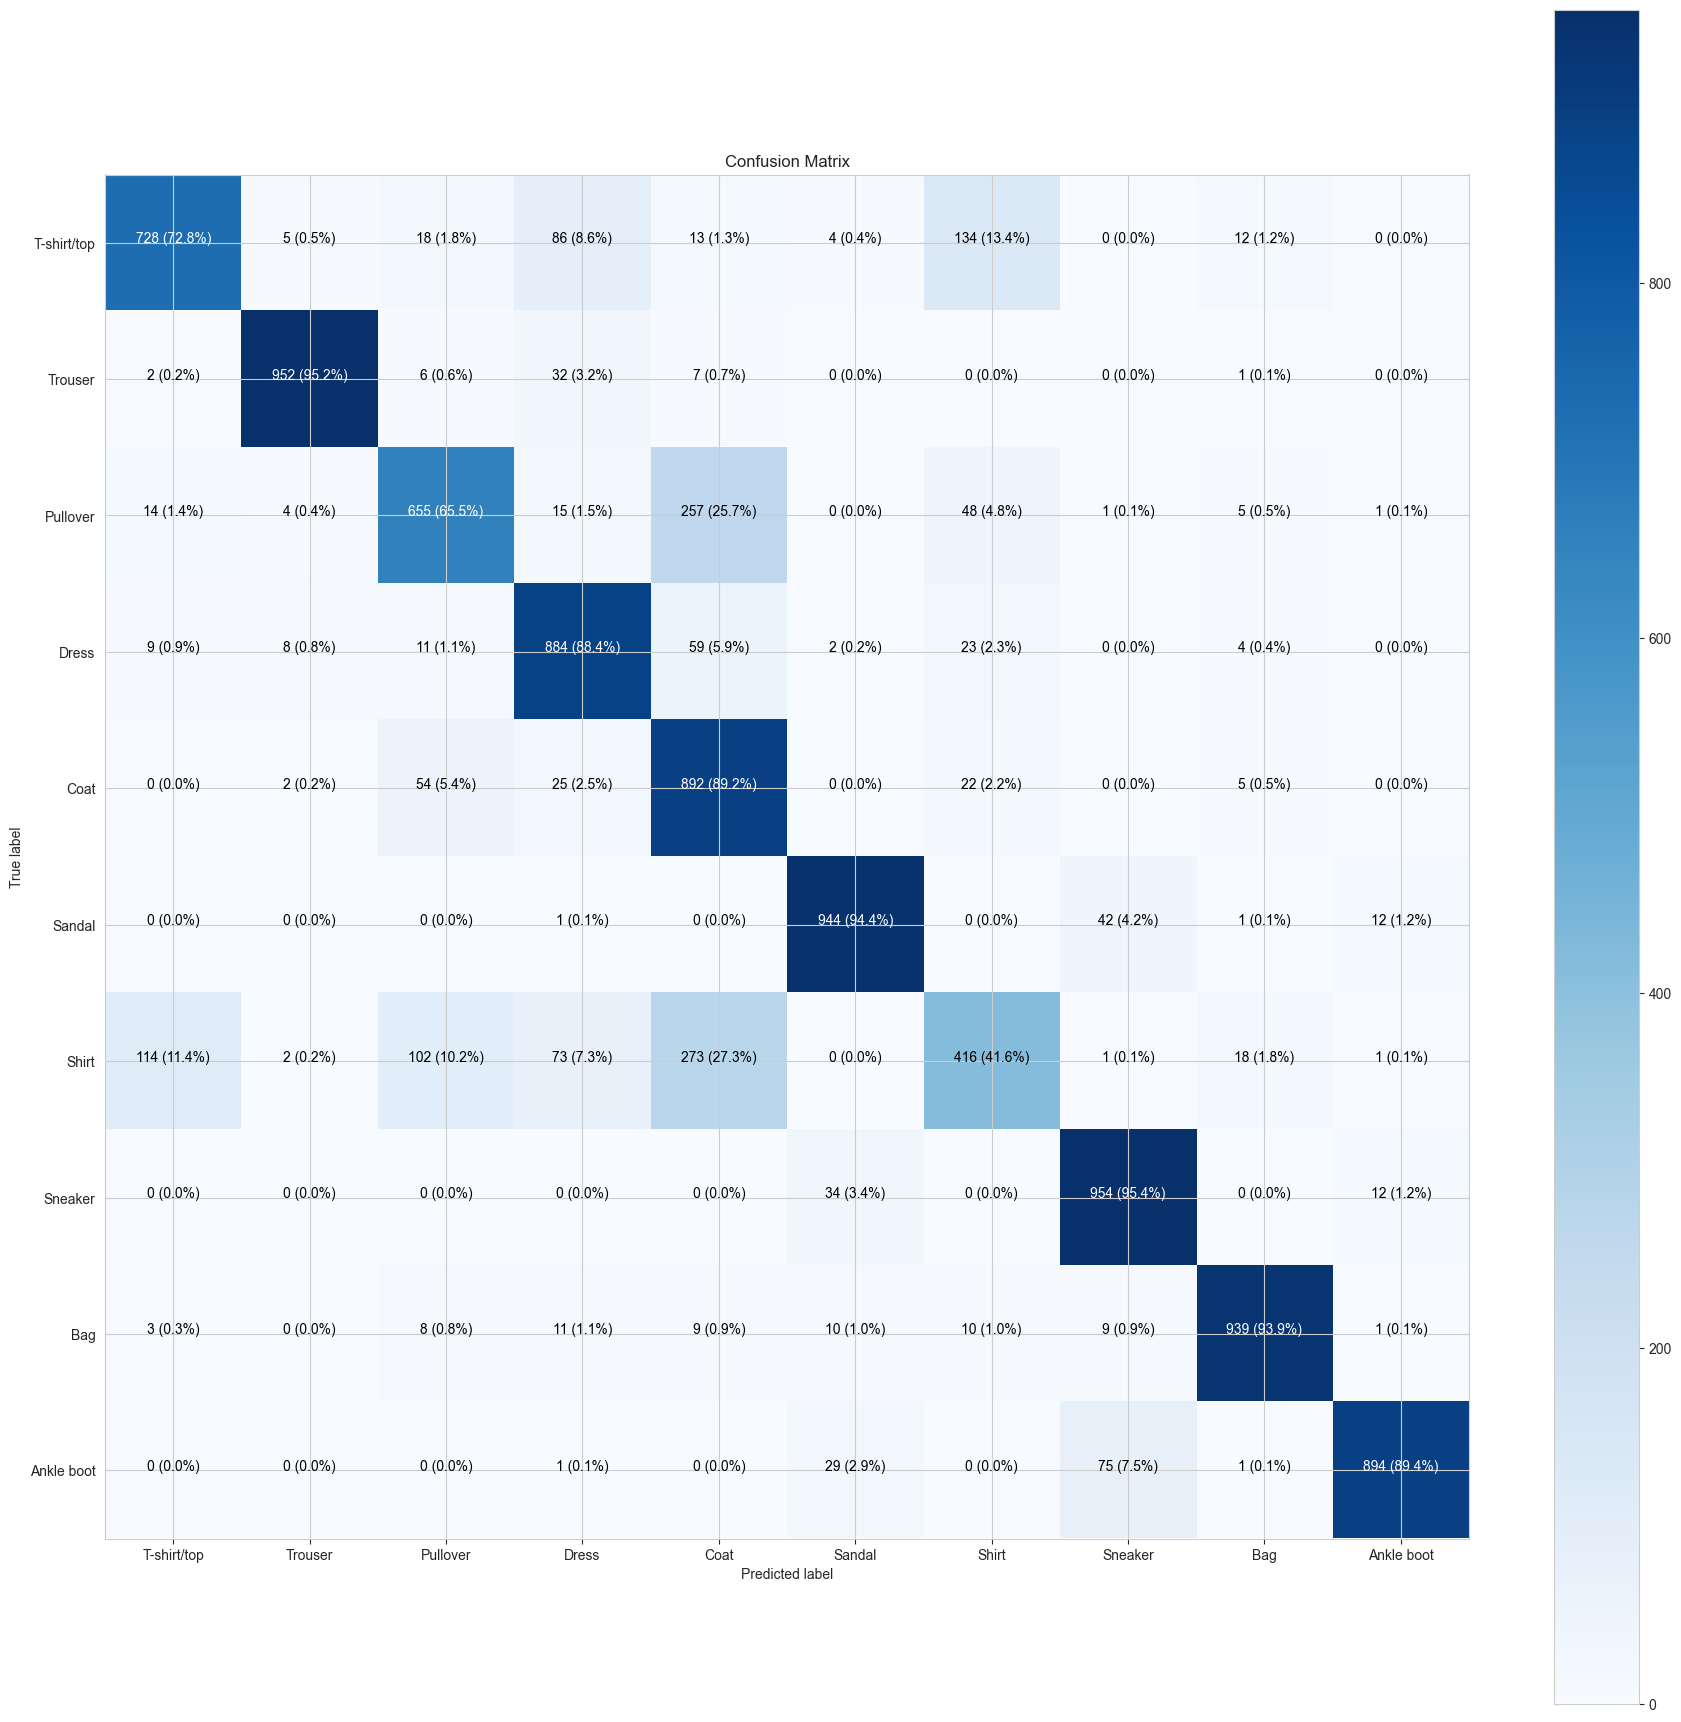

In [158]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=y_test,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(22, 22),
                      text_size=10)